In [1]:
#AML 11/14/15
#testing setting up the true labels for the polyASite2.0 Datasets for the sklearn.metrics.roc_curve 

#testing roc_curve
import numpy as np
import sklearn as sk
from sklearn import metrics
import matplotlib.pyplot as plt
import math
import pandas as pd

y = np.array([1, 1, 2, 2,1,2])
scores = np.array([0.1, 0.4, 0.35, 0.8,0.6,1.0])
fpr, tpr, thresholds = sk.metrics.roc_curve(y, scores, pos_label=2)
#print ("FPR: ", fpr)
#print ("TPR: ", tpr)
print ("Thresholds: ", thresholds)

#functions for calculating the 3 most common threshold choosing techniques:
#1) Threshold w/max distance from the 45 degree line
#2) Threshold w/min distance to point where Sensitivity=Specificity
#3) Threshold w/min distance to (1,1)

def maxPosDist45DegreeLine(fpr,tpr, threshs):
    #fpr is x, tpr is y
    #find the fpr,tpr,and threshold of the ROC point with the maximum positive distance from the 45 degree line
    maxPosDist = -1
    maxIndex = 0
    for i in range(0,len(fpr)):
        if tpr[i] >=fpr[i]: #above or on the 45 degree line
            currPosDist = tpr[i] - fpr[i] #since 45 degree line is y=x
            if currPosDist >= maxPosDist:
                    maxPosDist = currPosDist 
                    maxIndex = i
    if maxPosDist == -1:
        return None
    else:
        return fpr[maxIndex], tpr[maxIndex], threshs[maxIndex], maxPosDist


def findSpecifictySensitivityEqualityPoint(fpr,tpr,threshs):
    #find the prediction closest to where sensitivity=specificity
    minDiff = math.sqrt(2) #maximum possible distance for the unit cube of the ROC curve
    minIndex = 0
    for i in range(0,len(fpr)):
        if fpr[i] != 0.0 and tpr[i] != 0.0: #will always choose (0,0) if not blocked from doing so
            se = tpr[i]
            sp = 1 - fpr[i]
            currDiff = math.fabs(se-sp)
            if currDiff < minDiff:
                minDiff = currDiff
                minIndex = i
    if minDiff != math.sqrt(2):
        return fpr[minIndex], tpr[minIndex], threshs[minIndex], minDiff
    
def minDistanceTopLeftCorner(fpr,tpr,threshs):
    #find the prediction closest to (1,1)
    minDist = math.sqrt(2) #maximum possible distance for the unit cube of the ROC curve
    minIndex = 0
    for i in range(0,len(fpr)):
        currDist = math.sqrt((fpr[i])**2 + (1-tpr[i])**2)
        #print (currDist)
        if currDist < minDist:
            minDist = currDist
            minIndex = i
    if minDist != math.sqrt(2):
        return fpr[minIndex], tpr[minIndex], threshs[minIndex], minDist
    
posDistFPR, posDistTPR, posDistThresh, x  = maxPosDist45DegreeLine(fpr,tpr,thresholds)
equalFPR, equalTPR, equalThresh, x  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)
closeFPR, closeTPR, closeThresh, x  = minDistanceTopLeftCorner(fpr,tpr,thresholds)
print ("maxDistFPR: ", posDistFPR, " maxDistTPR: ", posDistTPR, "Threshold: ", posDistThresh)
print ("equalFPR: ", equalFPR, " equalTPR: ", equalTPR, "Threshold: ", equalThresh)
print ("closestFPR: ", equalFPR, " closestTPR: ", equalTPR, "Threshold: ", equalThresh)
plt.plot(fpr, tpr, )
plt.scatter(posDistFPR,posDistTPR, c = "blue",label = "Maxmimum Distance from 45")
plt.scatter(equalFPR,equalTPR, c = "red", label = "Closest to FPR=TPR")
plt.scatter(closeFPR, closeTPR, c = "green", label = "Closest to (1,1)")
plt.title("Demo ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

#the number of true positives in the entire genome is 5425800
#which means very spare signal to recover.....



Thresholds:  [2.   1.   0.8  0.4  0.35 0.1 ]
maxDistFPR:  0.0  maxDistTPR:  0.6666666666666666 Threshold:  0.8
equalFPR:  0.6666666666666666  equalTPR:  0.6666666666666666 Threshold:  0.4
closestFPR:  0.6666666666666666  closestTPR:  0.6666666666666666 Threshold:  0.4


<Figure size 640x480 with 1 Axes>

In [2]:
#Opening GL000219.1 predictions
strideSizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50]
names = ["GL000219.1"]
pred_slide1 = np.load("./PredictionBinaries/GL000219.1Predictions/GL000219_1_cutPredsStrideLen1.npy")
print (pred_slide1.size)

totalTrueLabels = np.zeros(pred_slide1.size)
print (totalTrueLabels.size)

179198
179198


/home/lafleur1/anaconda2/envs/aparent_proj/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total true labelled positions:  353
Total length of contig:  179198
Fraction of NT's which are APA sites:  0.001969888056786348
maxDistFPR:  0.25699348597947946  maxDistTPR:  0.5835694050991501 Threshold:  0.0006355198105904323
equalFPR:  0.34521513042019625  equalTPR:  0.6572237960339944 Threshold:  0.00041767958875381025
closestFPR:  0.34521513042019625  closestTPR:  0.6572237960339944 Threshold:  0.00041767958875381025
ROC AUC Score:  0.7028881815381781


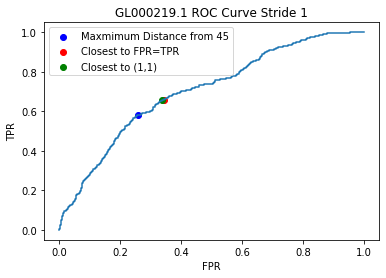

In [3]:
#opening all the true values
colnames = ["seqName",  "start" , "end",  "clusterID",  "avgTPM",  "strand",   "percentSupporting",   "protocolsSupporting",  "avgTPM2",   "type",   "upstreamClusters"]
pas_stuff =pd.read_csv('atlas.clusters.hg38.2-0.bed',delimiter='\t', names = colnames) 

#working with sites from just one unlocalized region GL000291.1
onGL000219 = pas_stuff['seqName'] == "GL000219.1"
onGLSites = pas_stuff[onGL000219]
#note that some of the sites overal (even though paper methods were supposed to filter those regions)
#change the values in the true labels for the whole contig to one for each PAS 
for index, row in onGLSites.iterrows():
    totalTrueLabels[row['start']:row['end']] = 1
    
print ("Total true labelled positions: ", np.sum(totalTrueLabels == 1))
print ("Total length of contig: ", totalTrueLabels.size)
print ("Fraction of NT's which are APA sites: ", np.sum(totalTrueLabels == 1)/totalTrueLabels.size)
pred_slide1 = np.reshape(pred_slide1, totalTrueLabels.shape)
#rinding ROC and ROC AUC
fpr, tpr, thresholds = sk.metrics.roc_curve(totalTrueLabels, pred_slide1)
auc_score = sk.metrics.roc_auc_score(totalTrueLabels,pred_slide1)
#finding best threshold values
posDistFPR, posDistTPR, posDistThresh, x  = maxPosDist45DegreeLine(fpr,tpr,thresholds)
equalFPR, equalTPR, equalThresh, x  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)
closeFPR, closeTPR, closeThresh, x  = minDistanceTopLeftCorner(fpr,tpr,thresholds)
#
print ("maxDistFPR: ", posDistFPR, " maxDistTPR: ", posDistTPR, "Threshold: ", posDistThresh)
print ("equalFPR: ", equalFPR, " equalTPR: ", equalTPR, "Threshold: ", equalThresh)
print ("closestFPR: ", equalFPR, " closestTPR: ", equalTPR, "Threshold: ", equalThresh)
print ("ROC AUC Score: ", auc_score)
plt.plot(fpr, tpr, )
plt.scatter(posDistFPR,posDistTPR, c = "blue",label = "Maxmimum Distance from 45")
plt.scatter(equalFPR,equalTPR, c = "red", label = "Closest to FPR=TPR")
plt.scatter(closeFPR, closeTPR, c = "green", label = "Closest to (1,1)")
plt.title("GL000219.1 ROC Curve Stride 1")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
